In [1]:

import math
import warnings
from datetime import datetime
start=datetime.now()
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import tree,model_selection
from sklearn.grid_search import GridSearchCV
# A convenience for displaying visualizations.
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns
import time
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
start=datetime.now()
rfc = ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import 

In [2]:
data=pd.read_csv('C:/Users/ankush/Desktop/Melbourne_housing_FULL.csv')

In [6]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.500,3067.000,...,1.000,1.000,126.000,nan,nan,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,...,1.000,1.000,202.000,nan,nan,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,...,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.500,3067.000,...,2.000,1.000,0.000,nan,nan,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,...,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [96]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    3
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [3]:
#Filling in NA values for bedroom and bathroom
data['Bedroom2'].fillna((data['Rooms']), inplace=True)
data['Bathroom'].fillna((data['Rooms']-1), inplace=True)

In [4]:
data['Price'].fillna(data['Price'].mean()).head()

0   1050173.345
1   1480000.000
2   1035000.000
3   1050173.345
4   1465000.000
Name: Price, dtype: float64

In [5]:
data=data.drop(data['YearBuilt'].idxmin(),axis=0)


In [6]:
data['YearBuilt'].fillna((data['YearBuilt'].mean()), inplace=True)
data['Postcode'].fillna((data['Postcode'].mean()), inplace=True)
data['Distance'].fillna((data['Distance'].mean()), inplace=True)
#Fill car with mean data.
data['Car'].fillna((data['Car'].mean()), inplace=True)
#Fill Lattitude and Longtitude with the row above.
data['Lattitude'].fillna(method='ffill', inplace=True)
data['Longtitude'].fillna(method='ffill', inplace=True)

#Fill landsize and building area with median data.
data['Landsize'].fillna((data['Landsize'].median()), inplace=True)
data['BuildingArea'].fillna((data['BuildingArea'].median()), inplace=True)
data['Price'].fillna((data['Price'].mean()), inplace=True)

In [47]:
print(data.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [9]:
data1=data.drop(['Suburb','Address','SellerG','Date','CouncilArea','Regionname', 'Propertycount','Type','Method'],axis=1)
data1.columns


Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')

In [10]:
data2=data1.drop(['Price'],axis=1)


# Exploring the data

C:\Users\ankush\anacondanew\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


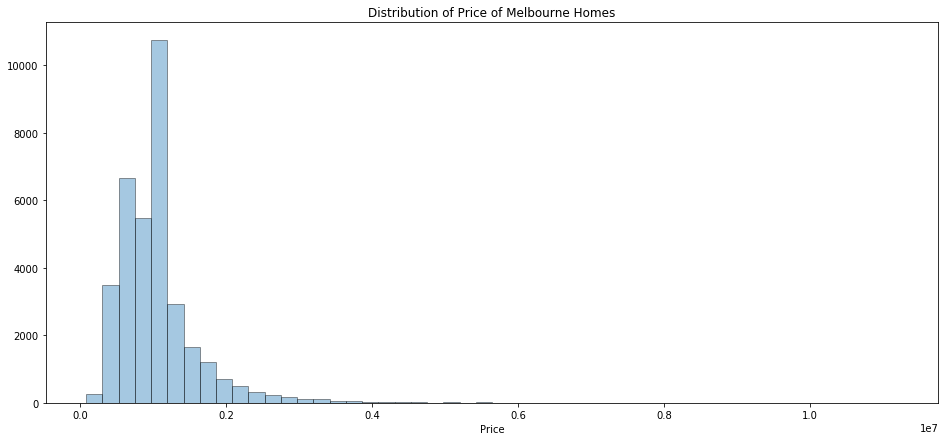

In [75]:
plt.figure(figsize=(16,7))
sns.distplot(data1['Price'], kde = False,hist_kws=dict(edgecolor="k"))
plt.title('Distribution of Price of Melbourne Homes')
plt.show()

The housing prices seem to be normally distributed, there is no abnormality

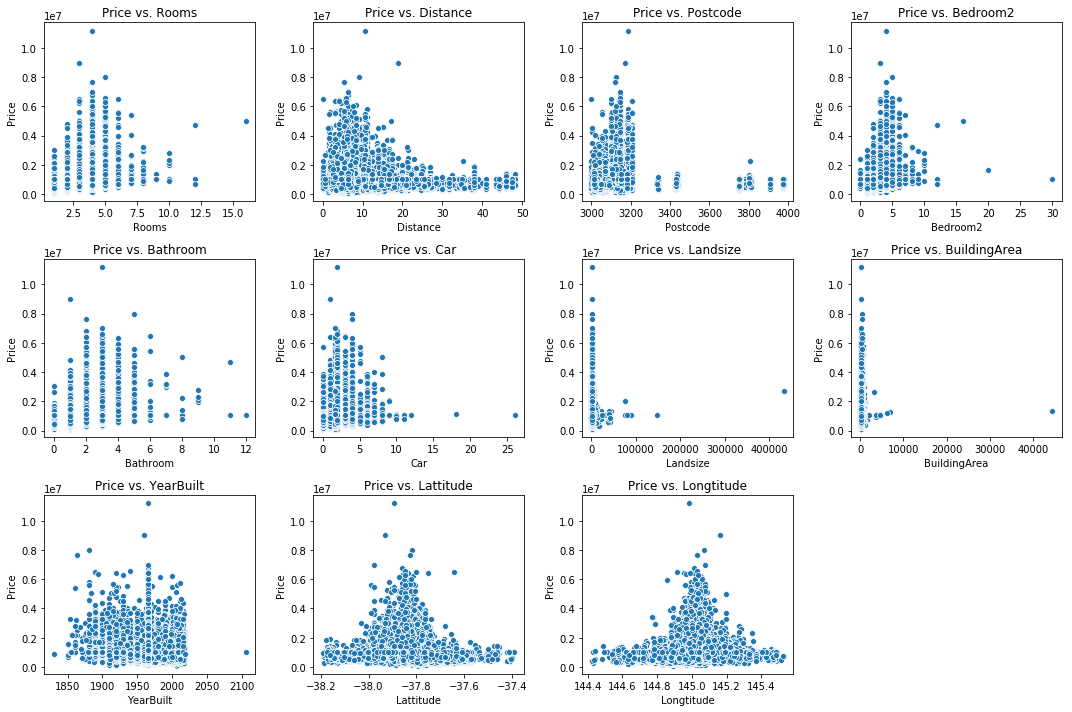

In [73]:
plt.figure(figsize=(15,10))
i=1
for col in data2.columns:
    plt.subplot(3,4,i)
    sns.scatterplot(data2[col],data1['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title('Price vs. {}'.format(col))
    i+=1
plt.tight_layout()

There are few things to be noticed-

1.Mojority of houses are in between 3000 to 3200 zipcode.

2.Majorirty of houses have 4-5 bedrooms

3.As rooms/bedrooms increase,price is also increasing


In [83]:
data1['Price'].describe()


count      34854.000
mean     1050179.964
std       567156.814
min        85000.000
25%       695000.000
50%      1050179.964
75%      1150000.000
max     11200000.000
Name: Price, dtype: float64

The above shows the mean price of housing is around 1 AUD

Text(0.5,1,'Variable Correlation')

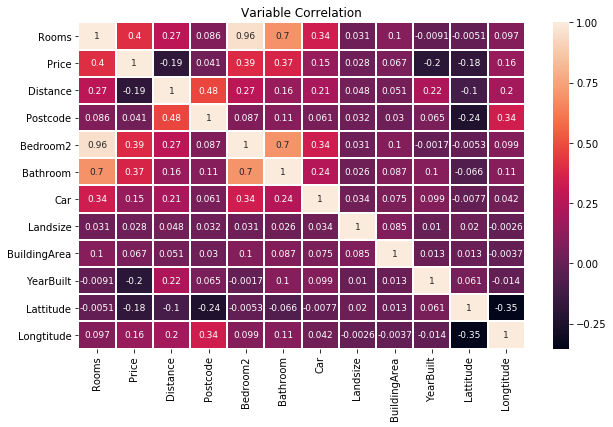

In [84]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(),linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

### Few things are noticed with the heatmap-
#### Weak Positive Correlation

Year Built and Price

#### Moderate Positive Correlation

Rooms and Price

Bathrooms and Price

Bathroom and Bedroom

Price and Distance



Since we have done some analysis about the features and their relation with the outcome variable prices,lets go ahead with using models to check the accuracy now.

In [8]:
X=data.drop(['Suburb','Address','SellerG','Date','CouncilArea','Regionname', 'Propertycount','Type','Method','Price'],axis=1)
Y=data['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# Regression Models

## 1.Linear Regression

In [169]:
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print("R-squared :",regr.score(X_train, y_train))

Coefficients: 
 [ 2.13750173e+05 -3.26159698e+04  6.21994767e+02  5.05331226e+03
  9.94110093e+04  4.95418320e+04  5.04778830e+00  6.16514336e+01
 -3.17371161e+03 -8.80113253e+05  4.48595017e+05]
Intercept: 
 -93539122.89478436
R-squared : 0.35615342277384954


R-squared is on the lower side, so we decided to add 2 dummy variables which will help us to improve R-squared

In [170]:
data['Car_dummy']=np.where(data['Car']>0,1,0)
data['Price_dummy']=np.where(data['Price']>1000000,1,0)


In [171]:
X=data.drop(['Suburb','Address','SellerG','Date','CouncilArea','Regionname', 'Propertycount','Type','Method','Price'],axis=1)
Y=data['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
# Fit our model to our data.
regr.fit(X_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print("R-squared :",regr.score(X_train, y_train))

Coefficients: 
 [ 1.10323259e+05 -1.91125777e+04  3.59588646e+02  1.70967853e+04
  7.45610061e+04  4.66220811e+04  3.41536644e+00  3.78017233e+01
 -1.81736938e+03 -4.37520711e+05  2.02581714e+05 -4.94773057e+04
  4.86442645e+05]
Intercept: 
 -43011966.19201135
R-squared : 0.48668101352408943


If notice above,R-squared seems improved

In [174]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_class = model_selection.GridSearchCV(regr,parameters, cv=10)

grid_class.fit(X_train,y_train)
#The best hyper parameters set

results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)


[{'copy_X': True, 'fit_intercept': True, 'normalize': True}, {'copy_X': True, 'fit_intercept': True, 'normalize': False}, {'copy_X': True, 'fit_intercept': False, 'normalize': True}, {'copy_X': True, 'fit_intercept': False, 'normalize': False}, {'copy_X': False, 'fit_intercept': True, 'normalize': True}, {'copy_X': False, 'fit_intercept': True, 'normalize': False}, {'copy_X': False, 'fit_intercept': False, 'normalize': True}, {'copy_X': False, 'fit_intercept': False, 'normalize': False}]
[0.37387574 0.37387574 0.36916528 0.36916528 0.37387574 0.37387574
 0.36916528 0.36916528]
[0.48719265 0.48719265 0.48400382 0.48400382 0.48719265 0.48719265
 0.48400382 0.48400382]
Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.3738757401569352
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [186]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print ("Training Data accuracy: ",cross_val_score(grid_class, X_train,y_train, cv=5))
print ("Testing Data accuracy: ",cross_val_score(grid_class, X_test,y_test, cv=5))

Training Data accuracy:  [-0.04874703  0.46563733  0.47421279  0.48367312  0.50635125]
Testing Data accuracy:  [0.51513319 0.52997135 0.47247786 0.48866262 0.49697274]


In [179]:
print("R-squared :",grid_class.score(X_train, y_train))

R-squared : 0.48668101352408955


After using gridsearch and getting the best parameters, thr accuracy didnot change .Accuracy score is  a little low.

In [181]:
print("Mean square Error: ",cross_val_score(grid_class, X_train, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.62196100e+11 -1.69591810e+11 -1.56841415e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


This could be because of overfitting,lets use partial least squares regression for dimension reduction.This might help to improve R-Squared

## PLS Dimension Reduction

In [184]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X_train, y_train)

# Save predicted values.
Y_PLS_pred = pls1.predict(X_train)
print('R-squared PLSR:', pls1.score(X_train, y_train))

R-squared PLSR: 0.4853366327945259


In [188]:
print("Mean square Error: ",cross_val_score(pls1, X_train, y_train, cv=3, scoring='mean_squared_error'))

Mean square Error:  [-2.76319468e+11 -1.69852632e+11 -1.57215290e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Even using PLS  didnot impove the accuracy of the model.Also, there seems to be overfitting in the features.Now, lets use selectkbest(SKB) to see if it impproves the accuracy after dimension reduction

## SKB

In [189]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
skb_test = SelectKBest(score_func=f_regression,k=3)
X_train_kbest = skb_test.fit_transform(X_train, y_train)


In [190]:
#Gridsearchcv
skb = SelectKBest(k=3)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Now,we will gridsearchcv to get the best set of parameters

In [193]:
dt_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_DT_skb=model_selection.GridSearchCV(regr,dt_grid,cv=6)
grid_DT_skb.fit(X_train_skb, y_train)

#grid_class_pca=model_selection.GridSearchCV(random_f_pca,dt_grid_pca,refit=True,return_train_score=True)
#grid_class_pca.fit(X_train_pca, y_train_pca)
#Displaying the parameters using Grid search
results_skb = grid_DT_skb.cv_results_
print(results_skb.get('params'))
print(results_skb.get('mean_test_score'))
print(results_skb.get('mean_train_score'))
print(grid_DT_skb.best_params_)
print(grid_DT_skb.best_score_)
final_model = grid_DT_skb.best_estimator_
print(final_model)

[{'copy_X': True, 'fit_intercept': True, 'normalize': True}, {'copy_X': True, 'fit_intercept': True, 'normalize': False}, {'copy_X': True, 'fit_intercept': False, 'normalize': True}, {'copy_X': True, 'fit_intercept': False, 'normalize': False}, {'copy_X': False, 'fit_intercept': True, 'normalize': True}, {'copy_X': False, 'fit_intercept': True, 'normalize': False}, {'copy_X': False, 'fit_intercept': False, 'normalize': True}, {'copy_X': False, 'fit_intercept': False, 'normalize': False}]
[0.43244167 0.43244167 0.40275156 0.40275156 0.43244167 0.43244167
 0.40275156 0.40275156]
[ 0.43214366  0.43214366  0.40255646  0.40255646 -1.64707891 -1.22504345
  0.40255646  0.40255646]
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.43244166701872877
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [195]:
print('R-squared after SKB:', grid_DT_skb.score(X_train_skb, y_train))

R-squared after SKB: 0.4321152826821323


In [197]:
print("Mean square Error: ",cross_val_score(grid_DT_skb, X_train_skb, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-1.86347646e+11 -1.86196591e+11 -1.74918435e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


R-squared and mean squared are not good as we expected after using SKB.Lets go to KNN Regression model

# KNN Regression Model

In [211]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

# Trailing underscores are a common convention for a prediction.
#Y_ = knn.predict(y_train)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X_train, y_train)
#Y_w = knn_w.predict(y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [212]:
score = cross_val_score(knn, X_train, y_train, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_train, y_train, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.36 (+/- 0.03)
Weighted Accuracy: 0.36 (+/- 0.04)


In [215]:
print("R-squared :",knn.score(X_train, y_train))

R-squared : 0.4958018278327544


In [232]:
print("Mean square Error: ",cross_val_score(knn, X_train, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.12107017e+11 -2.09448250e+11 -1.97475809e+11]


If we observe above, accuracy score  is low and R-squared is also low and Mean square error is ok.Now,we will use gridsearchcv to get the best parameters

In [225]:
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_class = model_selection.GridSearchCV(knn, param_grid, cv=10)
grid_class.fit(X_train, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_DT_skb.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}]
[-0.0018874   0.21866355  0.27989577  0.31261034  0.33848308  0.35342105
  0.36115826  0.36568827  0.36754275  0.36870367]
[0.98451719 0.749347   0.65602188 0.60288905 0.57161696 0.54855269
 0.53063778 0.51561372 0.50334653 0.49279549]
{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.3687036659005452
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Using Dimension Reduction PCA to reduce the components as below

In [227]:
X_pca = PCA(n_components=3)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)

In [228]:

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.9908078  0.00786567 0.00125889]


By using PCA, we can see 3 features are closely correlated to the output variable so we will keep them Now we will use these models after doing PCA-

1.GridsearchCV

2.R-squared

3.Mean Square Error

In [229]:
#Gridsearchcv to get the best parameters
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_class = model_selection.GridSearchCV(knn, param_grid, cv=10)
grid_class.fit(X_train_pca, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}]
[-0.17457604  0.10112331  0.1839159   0.22539551  0.2525312   0.26332051
  0.27288388  0.28079015  0.28516347  0.28967983]
[0.98369103 0.70985077 0.60451389 0.54904212 0.51208525 0.48623822
 0.46580304 0.44921706 0.43575583 0.42485942]
{'n_neighbors': 10}
0.28967983432072353
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [231]:
#R-squared
print("R-squared :",grid_class.score(X_train_pca, y_train))


R-squared : 0.42850340651250507


In [233]:
print("Mean square Error: ",cross_val_score(grid_class, X_train_pca, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.38392920e+11 -2.36595682e+11 -2.27254245e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [235]:
print(cross_val_score(grid_class, X_train_pca, y_train, cv=5))


[0.26698853 0.27239491 0.29802    0.27386288 0.30511362]


If we observe above, accuracy score is low and R-squared is also low and Mean square error is ok.Also, there seems to be overfitting in the features.Now, lets use selectkbest(SKB) to see if it impproves the accuracy after dimension reduction

In [236]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
skb_test = SelectKBest(score_func=f_regression,k=3)
X_train_kbest = skb_test.fit_transform(X_train, y_train)

In [237]:
#Gridsearchcv
skb = SelectKBest(k=3)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [238]:
#Gridsearchcv to get the best parameters
param_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_class = model_selection.GridSearchCV(knn, param_grid, cv=10)
grid_class.fit(X_train_skb, y_train)
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}]
[-0.19877756  0.20798109  0.28176103  0.30333591  0.32541961  0.33212665
  0.36210937  0.38136109  0.38930696  0.39333509]
[-0.13026497  0.22903153  0.2852009   0.30176545  0.32995252  0.33450359
  0.36491419  0.38498118  0.39180493  0.39748103]
{'n_neighbors': 10}
0.3933350940756162
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [240]:
#R-squared
print("R-squared :",grid_class.score(X_train_skb, y_train))


R-squared : 0.4309561895551258


In [241]:
print("Mean square Error: ",cross_val_score(grid_class, X_train_skb, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-1.91359336e+11 -2.01339320e+11 -1.78041346e+11]


In [242]:
print(cross_val_score(grid_class, X_train_skb, y_train, cv=5))

[0.43578777 0.39993749 0.41126588 0.42056163 0.40006994]


We notice that PCA and SKB has similar accuracy score.Both are taking same time to run as well.

# Decision Tree

In [254]:
# gridsearchCV to get the best parameters for tunning
decision_tree = tree.DecisionTreeRegressor(max_depth=50)
decision_tree.fit(X_train, y_train)
from sklearn.model_selection import train_test_split
dt_grid={'max_depth':[50],'max_features': [12]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [50], 'max_features': [12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
Lets go ahead with determining R squared,Mean square error, Cross validation accuracy

In [259]:
#R-squared
print("R-squared :",grid_class_dt.score(X_train, y_train))



R-squared : 0.9907664107844378


In [260]:
#Cross validation score 
print(cross_val_score(grid_class_dt, X_train, y_train, cv=5))

[0.14320052 0.1971203  0.19424754 0.21887207 0.21048006]


In [261]:
print("Mean square Error: ",cross_val_score(grid_class_dt, X_train, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.69920408e+11 -2.69082143e+11 -2.66684965e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


If we notice above, R squared is very good but the accuracy score is very low.Mean square error is also not that good.

In [264]:
# And let's see what percentage of decisions are accounted for with the top X features.
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[:18]
for n_idx in range(2, 16, 2):
    print('Percentage of decisions accounted for with {} features: {}'.format(n_idx, importances[indices[:n_idx]].sum()))
print('Total Features: ' + str(len(indices)))

Percentage of decisions accounted for with 2 features: 0.49274101530520753
Percentage of decisions accounted for with 4 features: 0.6721434287709996
Percentage of decisions accounted for with 6 features: 0.8119006181910405
Percentage of decisions accounted for with 8 features: 0.9094497805688075
Percentage of decisions accounted for with 10 features: 0.9684379431795094
Percentage of decisions accounted for with 12 features: 0.9989133817039997
Percentage of decisions accounted for with 14 features: 0.9999999999999998
Total Features: 13


In [279]:
X_pca = PCA(n_components=8)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)

In [280]:

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.62042305e-01 3.24936581e-02 5.18495485e-03 2.62926716e-04
 1.46954892e-05 9.50671805e-07 2.81965380e-07 1.09093296e-07]


By using PCA, we can see 8 features are closely correlated to the output variable so we will keep them Now we will use these models after doing PCA-

1.GridsearchCV

2.R-squared

3.Mean Square Error

In [281]:
#Using Grid search  for finding the best set of parameters with random Forest model
dt_grid_pca={'max_depth':[10],'max_features': [8]}
grid_dt_pca=model_selection.GridSearchCV(decision_tree,dt_grid_pca,cv=6)
grid_dt_pca.fit(X_train_pca, y_train)

#grid_class_pca=model_selection.GridSearchCV(random_f_pca,dt_grid_pca,refit=True,return_train_score=True)
#grid_class_pca.fit(X_train_pca, y_train_pca)
#Displaying the parameters using Grid search
results_pca = grid_dt_pca.cv_results_
print(results_pca.get('params'))
print(results_pca.get('mean_test_score'))
print(results_pca.get('mean_train_score'))
print(grid_dt_pca.best_params_)
print(grid_dt_pca.best_score_)
final_model_pca = grid_dt_pca.best_estimator_
print(final_model_pca)

[{'max_depth': 10, 'max_features': 8}]
[0.34152754]
[0.62276261]
{'max_depth': 10, 'max_features': 8}
0.3415275383385336
DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Lets go ahead with determining R squared,Mean square error, Cross validation accuracy after PCA

In [282]:
#R-squared
print("R-squared :",grid_dt_pca.score(X_train_pca, y_train))


R-squared : 0.6105686527907401


In [283]:
#Cross validation score 
print(cross_val_score(grid_dt_pca, X_train_pca, y_train, cv=5))

[0.39026739 0.32255764 0.27185238 0.30362429 0.41505132]


In [284]:
print("Mean square Error: ",cross_val_score(grid_dt_pca, X_train_pca, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.02287871e+11 -2.30119709e+11 -1.99204505e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


After PCA, the accuracy score has improved.R2 seems to be ok.Overall result is not convincing.

# Random Forest

In [11]:
start=datetime.now()
rfc = ensemble.RandomForestRegressor()
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Now, we will use gridsearchcv to get the best parameters

In [12]:
dt_grid={'max_depth':[3,4,5],'max_features': [11]}

grid_class=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'max_features': [11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:

#Displaying the parameters using Grid searchcv
results = grid_class.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_params_)
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 11}, {'max_depth': 4, 'max_features': 11}, {'max_depth': 5, 'max_features': 11}]
[0.31367862 0.38330148 0.42075624]
[0.31511086 0.39048913 0.44674822]
{'max_depth': 5, 'max_features': 11}
0.42075623712049554
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Now, once the parameters are tuned,we will get accuracies using cross validation,R2 and Mean square error

In [14]:
#R-squared
print("R-squared :",grid_class.score(X_train, y_train))


R-squared : 0.44214814548377424


In [15]:
#Cross validation score 
print(cross_val_score(grid_class, X_train, y_train, cv=5))

[0.3961081  0.43827301 0.42107818 0.41093077 0.42488573]


In [16]:
print("Mean square Error: ",cross_val_score(grid_class, X_train, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-1.83378360e+11 -1.93126377e+11 -1.83644446e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Overall results are not promising,accuracies are below than 50% and r2 is also not that good.Now, we will use PCA to check if dimension reduction has any impact on accuracy

In [17]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
top_indices = indices[:55]
for n_idx in range(2, 14, 2):
    print('Percentage of decisions accounted for with {} features: {}'.format(n_idx, importances[indices[:n_idx]].sum()))
print('Total Features: ' + str(len(indices)))

Percentage of decisions accounted for with 2 features: 0.3716556066673148
Percentage of decisions accounted for with 4 features: 0.614639621215651
Percentage of decisions accounted for with 6 features: 0.8337328890820599
Percentage of decisions accounted for with 8 features: 0.9405253977439858
Percentage of decisions accounted for with 10 features: 0.9908568772243003
Percentage of decisions accounted for with 12 features: 1.0
Total Features: 11


Let's reduce to 8 features since we could potentially account for 94% of the decisions from the Random Forest.

In [18]:

#Using PCA
n_indices = 8
X_train.columns[indices[:n_indices]]

Index(['Distance', 'Rooms', 'Longtitude', 'Postcode', 'Landsize', 'Lattitude',
       'BuildingArea', 'YearBuilt'],
      dtype='object')

In [19]:
X_pca = PCA(n_components=8)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)

In [20]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.90458083e-01 8.18692237e-03 1.28685300e-03 6.42370097e-05
 3.57761947e-06 2.25441627e-07 6.88430771e-08 2.64106744e-08]


Now we will use these techniques after doing PCA-

1.GridsearchCV

2.R-squared

3.Cross validation score

4.Mean Square Error

In [23]:
dt_grid_pca={'max_depth':[10],'max_features': [8]}
grid_rf_pca=model_selection.GridSearchCV(rfc,dt_grid_pca,cv=6)
grid_rf_pca.fit(X_train_pca, y_train)

#grid_class_pca=model_selection.GridSearchCV(random_f_pca,dt_grid_pca,refit=True,return_train_score=True)
#grid_class_pca.fit(X_train_pca, y_train_pca)
#Displaying the parameters using Grid search
results_pca = grid_rf_pca.cv_results_
print(results_pca.get('params'))
print(results_pca.get('mean_test_score'))
print(results_pca.get('mean_train_score'))
print(grid_rf_pca.best_params_)
print(grid_rf_pca.best_score_)
final_model_pca = grid_rf_pca.best_estimator_
print(final_model_pca)

[{'max_depth': 10, 'max_features': 8}]
[0.45919877]
[0.62386212]
{'max_depth': 10, 'max_features': 8}
0.4591987738146171
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [24]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_rf_pca.score(X_train_pca,y_train))

R-squared : 0.6199441298446099


In [25]:
#Cross validation score 
print(cross_val_score(grid_rf_pca, X_train_pca, y_train, cv=5))

[0.43237888 0.46904585 0.44359192 0.45263558 0.45883207]


In [26]:
print("Mean square Error: ",cross_val_score(grid_rf_pca, X_train_pca, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-1.76080706e+11 -1.88013397e+11 -1.70304424e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Accuracies are not that good even after using PCA but R2 has improved somewhat.Now,lets use SKB and compare it with PCA

In [32]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#names = X_train.columns[indices[:n_indices]]
skb_test = SelectKBest(score_func=f_regression,k=8)
X_train_kbest = skb_test.fit_transform(X_train, y_train)

Using selectkbest , we have got 8 best features. Now we will use these methods to validate the accuracy of the model

1.GridsearchCV

2.R-squared

3.Cross Validation

4.Mean Square Error

In [36]:
skb = SelectKBest(k=8)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

Usually its a good practice to assign max depth as highest as possible.Here we have chose it as 50.Max_features is 11.Now,we will gridsearchcv to get the best set of parameters

In [38]:
#Using Grid search  for finding the best set of parameters with random Forest model

dt_grid_skb={'max_depth':[10],'max_features': [8]}
grid_DT_skb=model_selection.GridSearchCV(rfc,dt_grid_skb,cv=6)
grid_DT_skb.fit(X_train_skb, y_train)

#grid_class_pca=model_selection.GridSearchCV(random_f_pca,dt_grid_pca,refit=True,return_train_score=True)
#grid_class_pca.fit(X_train_pca, y_train_pca)
#Displaying the parameters using Grid search
results_skb = grid_DT_skb.cv_results_
print(results_skb.get('params'))
print(results_skb.get('mean_test_score'))
print(results_skb.get('mean_train_score'))
print(grid_DT_skb.best_params_)
print(grid_DT_skb.best_score_)
final_model_pca = grid_DT_skb.best_estimator_
print(final_model_pca)


[{'max_depth': 10, 'max_features': 8}]
[0.43493117]
[0.58586994]
{'max_depth': 10, 'max_features': 8}
0.43493117069704584
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [39]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_DT_skb.score(X_train_skb,y_train))

R-squared : 0.5746013259878266


In [40]:
#Cross validation score 
print(cross_val_score(grid_DT_skb, X_train_skb, y_train, cv=5))

[0.43242639 0.45843085 0.44766111 0.44440193 0.45333617]


In [41]:
print("Mean square Error: ",cross_val_score(grid_DT_skb, X_train_skb, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-1.77386209e+11 -1.84688977e+11 -1.78611337e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


# Ridge Regression

In [16]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)


Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
#Gridsearchcv to tune the parameters
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class=GridSearchCV(ridgeregr,dt_grid,cv=6)
grid_class.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_class.best_params_)
print("accuracy :",grid_class.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.01}
accuracy : 0.30286896848036915


In [46]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class.score(X_train,y_train))

R-squared : 0.33845389141297166


In [47]:
#Cross validation score 
print(cross_val_score(grid_class, X_train, y_train, cv=5))

[0.33164882 0.33673385 0.3501263  0.32022865 0.1590288 ]


In [48]:
print("Mean square Error: ",cross_val_score(grid_class, X_train, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.11174736e+11 -2.17849030e+11 -2.40503927e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [59]:
X_pca = PCA(n_components=8)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)

Now we will use these techniques after doing PCA-

1.GridsearchCV

2.R-squared

3.Cross validation score

4.Mean Square Error

In [60]:
#Gridsearchcv to tune the parameters
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class_pca=GridSearchCV(ridgeregr,dt_grid,cv=6)
grid_class_pca.fit(X_train_pca, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_class_pca.best_params_)
print("accuracy :",grid_class_pca.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.01}
accuracy : -3.1374758005385313


In [61]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class_pca.score(X_train_pca,y_train))

R-squared : -3.1099117368785425


In [62]:
#Cross validation score 
print(cross_val_score(grid_class_pca, X_train_pca, y_train, cv=5))

[-3.0446224  -3.3025839  -3.07223717 -3.09737419 -3.12227718]


In [ ]:
print("Mean square Error: ",cross_val_score(grid_class_pca, X_train_pca, y_train, cv=3, scoring='mean_squared_error'))

The scores are very bad, looks like this model is not all suitable to the data.Lets use SKB to check further

In [12]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#names = X_train.columns[indices[:n_indices]]
skb_test = SelectKBest(score_func=f_regression,k=8)
X_train_kbest = skb_test.fit_transform(X_train, y_train)


Using selectkbest , we have got 8 best features. Now we will use these methods to validate the accuracy of the model

1.GridsearchCV

2.R-squared

3.Cross Validation

4.Mean Square Error

In [18]:
skb = SelectKBest(k=8)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

In [20]:
#Using Grid search  for finding the best set of parameters with random Forest model

dt_grid_skb={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_DT_skb=model_selection.GridSearchCV(ridgeregr,dt_grid_skb,cv=6)
grid_DT_skb.fit(X_train_skb, y_train)

#grid_class_pca=model_selection.GridSearchCV(random_f_pca,dt_grid_pca,refit=True,return_train_score=True)
#grid_class_pca.fit(X_train_pca, y_train_pca)
#Displaying the parameters using Grid search
results_skb = grid_DT_skb.cv_results_
print(results_skb.get('params'))
print(results_skb.get('mean_test_score'))
print(results_skb.get('mean_train_score'))
print(grid_DT_skb.best_params_)
print(grid_DT_skb.best_score_)
final_model_pca = grid_DT_skb.best_estimator_
print(final_model_pca)

[{'alpha': 25}, {'alpha': 10}, {'alpha': 4}, {'alpha': 2}, {'alpha': 1.0}, {'alpha': 0.8}, {'alpha': 0.5}, {'alpha': 0.3}, {'alpha': 0.2}, {'alpha': 0.1}, {'alpha': 0.05}, {'alpha': 0.02}, {'alpha': 0.01}]
[0.31943623 0.31971508 0.3197692  0.31977758 0.31977974 0.31978
 0.31978029 0.31978041 0.31978045 0.31978048 0.31978048 0.31978048
 0.31978048]
[0.32021346 0.32049085 0.32054462 0.32055293 0.32055507 0.32055533
 0.32055561 0.32055573 0.32055577 0.32055579 0.32055579 0.3205558
 0.3205558 ]
{'alpha': 0.01}
0.3197804840961203
Ridge(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [22]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_DT_skb.score(X_train_skb,y_train))

R-squared : 0.3204693732712328


In [23]:
#Cross validation score 
print(cross_val_score(grid_DT_skb, X_train_skb, y_train, cv=5))

[0.33632341 0.31205865 0.31042038 0.31098002 0.32999438]


In [24]:
print("Mean square Error: ",cross_val_score(grid_DT_skb, X_train_skb, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.22970074e+11 -2.24657058e+11 -2.21717081e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Scores are looking better for SKB compared to PCA.Lets evaluate other models now

# LASSO REGRESSION

In [26]:
lassoregr=linear_model.Lasso(alpha=.35)
lassoregr.fit(X_train, y_train)


Lasso(alpha=0.35, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
from sklearn.model_selection import GridSearchCV
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class=GridSearchCV(lassoregr,dt_grid,cv=6)
grid_class.fit(X_train, y_train)
results = grid_class.cv_results_
print("tuned hpyerparameters :(best parameters) ",grid_class.best_params_)
print("accuracy :",grid_class.best_score_)
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

tuned hpyerparameters :(best parameters)  {'alpha': 0.01}
accuracy : 0.3170727918222993
[{'alpha': 25}, {'alpha': 10}, {'alpha': 4}, {'alpha': 2}, {'alpha': 1.0}, {'alpha': 0.8}, {'alpha': 0.5}, {'alpha': 0.3}, {'alpha': 0.2}, {'alpha': 0.1}, {'alpha': 0.05}, {'alpha': 0.02}, {'alpha': 0.01}]
[0.3170351  0.3170578  0.31706682 0.31706981 0.31707131 0.31707161
 0.31707206 0.31707236 0.31707251 0.31707266 0.31707273 0.31707278
 0.31707279]
[0.35526255 0.35526281 0.35526285 0.35526286 0.35526286 0.35526286
 0.35526286 0.35526286 0.35526286 0.35526286 0.35526286 0.35526286
 0.35526286]
0.3170727918222993
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [28]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class.score(X_train,y_train))

R-squared : 0.35459953757070495


In [29]:
#Cross validation score 
print(cross_val_score(grid_class, X_train, y_train, cv=5))

[0.14771781 0.34956437 0.3438036  0.34184596 0.36235875]


In [30]:
print("Mean square Error: ",cross_val_score(grid_class, X_train, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.43208722e+11 -2.13181135e+11 -2.11396421e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Scores look ok,now lets go through PCA and SKB

In [31]:
X_pca = PCA(n_components=8)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)


Now we will use these techniques after doing PCA-
1.GridsearchCV
2.R-squared
3.Cross validation score
4.Mean Square Error

In [32]:
#.GridsearchCV to get the best parameters
from sklearn.model_selection import GridSearchCV
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class=GridSearchCV(lassoregr,dt_grid,cv=6)
grid_class.fit(X_train_pca, y_train)
results = grid_class.cv_results_
print("tuned hpyerparameters :(best parameters) ",grid_class.best_params_)
print("accuracy :",grid_class.best_score_)
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

tuned hpyerparameters :(best parameters)  {'alpha': 0.01}
accuracy : 0.27639179196016006
[{'alpha': 25}, {'alpha': 10}, {'alpha': 4}, {'alpha': 2}, {'alpha': 1.0}, {'alpha': 0.8}, {'alpha': 0.5}, {'alpha': 0.3}, {'alpha': 0.2}, {'alpha': 0.1}, {'alpha': 0.05}, {'alpha': 0.02}, {'alpha': 0.01}]
[0.2763787  0.27638656 0.2763897  0.27639075 0.27639127 0.27639138
 0.27639154 0.27639164 0.27639169 0.27639174 0.27639177 0.27639179
 0.27639179]
[0.32207964 0.32207965 0.32207965 0.32207965 0.32207965 0.32207965
 0.32207965 0.32207965 0.32207965 0.32207965 0.32207965 0.32207965
 0.32207965]
0.27639179196016006
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [34]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class.score(X_train_pca,y_train))

R-squared : 0.32135857874896123


In [35]:
#Cross validation score 
print(cross_val_score(grid_class, X_train_pca, y_train, cv=5))

[0.07354969 0.3185148  0.31662889 0.30749989 0.32955236]


In [36]:
print("Mean square Error: ",cross_val_score(grid_class, X_train_pca, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.60782051e+11 -2.23554131e+11 -2.21830890e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Scores look weak ,lets use SKB now

In [37]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#names = X_train.columns[indices[:n_indices]]
skb_test = SelectKBest(score_func=f_regression,k=8)
X_train_kbest = skb_test.fit_transform(X_train, y_train)

In [38]:
skb = SelectKBest(k=8)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)


Using selectkbest , we have got 8 best features. Now we will use these methods to validate the accuracy of the model
1.GridsearchCV
2.R-squared
3.Cross Validation
4.Mean Square Error

In [41]:
#.GridsearchCV to get the best parameters
from sklearn.model_selection import GridSearchCV
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class=GridSearchCV(lassoregr,dt_grid,cv=6)
grid_class.fit(X_train_skb, y_train)
results = grid_class.cv_results_
print("tuned hpyerparameters :(best parameters) ",grid_class.best_params_)
print("accuracy :",grid_class.best_score_)
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

tuned hpyerparameters :(best parameters)  {'alpha': 10}
accuracy : 0.34233613519271233
[{'alpha': 25}, {'alpha': 10}, {'alpha': 4}, {'alpha': 2}, {'alpha': 1.0}, {'alpha': 0.8}, {'alpha': 0.5}, {'alpha': 0.3}, {'alpha': 0.2}, {'alpha': 0.1}, {'alpha': 0.05}, {'alpha': 0.02}, {'alpha': 0.01}]
[0.34233604 0.34233614 0.34233611 0.3423361  0.34233609 0.34233609
 0.34233608 0.34233608 0.34233608 0.34233608 0.34233608 0.34233608
 0.34233608]
[0.34310133 0.34310157 0.34310161 0.34310161 0.34310161 0.34310161
 0.34310161 0.34310161 0.34310161 0.34310161 0.34310161 0.34310161
 0.34310161]
0.34233613519271233
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [42]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class.score(X_train_skb,y_train))

R-squared : 0.3430119980606766


In [43]:
#Cross validation score 
print(cross_val_score(grid_class, X_train_skb, y_train, cv=5))

[0.35773509 0.33591002 0.33126758 0.3334659  0.35401002]


In [44]:
print("Mean square Error: ",cross_val_score(grid_class, X_train_skb, y_train, cv=3, scoring='mean_squared_error'))

C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Mean square Error:  [-2.16001162e+11 -2.17054625e+11 -2.14186136e+11]


C:\Users\ankush\anacondanew\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Both PCA and SKB has similar accuracy scores.Lets go through other models now

# SVR

In [9]:
svm = SVR()
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(svm,param_grid,refit = True)
grid_class_svm.fit(X_train, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [ ]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class_svm.score(X_train,y_train))

In [ ]:
#Cross validation score 
print(cross_val_score(grid_class_svm, X_train, y_train, cv=5))

In [ ]:
print("Mean square Error: ",cross_val_score(grid_class_svm, X_train, y_train, cv=3, scoring='mean_squared_error'))

In [ ]:
lets use PCA now

In [ ]:
X_pca = PCA(n_components=8)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)

In [ ]:
Now we will use these techniques after doing PCA- 1.GridsearchCV 2.R-squared 3.Cross validation score 4.Mean Square Error

In [ ]:
#.GridsearchCV to get the best parameters
from sklearn.model_selection import GridSearchCV
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class=GridSearchCV(svm,dt_grid,cv=6)
grid_class.fit(X_train_pca, y_train)
results = grid_class.cv_results_
print("tuned hpyerparameters :(best parameters) ",grid_class.best_params_)
print("accuracy :",grid_class.best_score_)
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

In [ ]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class.score(X_train_pca,y_train))

In [ ]:
#Cross validation score 
print(cross_val_score(grid_class, X_train_pca, y_train, cv=5))

In [ ]:
print("Mean square Error: ",cross_val_score(grid_class, X_train_pca, y_train, cv=3, scoring='mean_squared_error'))

Accuracy scores look to be ok, similar to what we have been getting in the previous models.Lets take a look at SKB

In [ ]:
#selectkbest to get the scores of the best parameters
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#names = X_train.columns[indices[:n_indices]]
skb_test = SelectKBest(score_func=f_regression,k=8)
X_train_kbest = skb_test.fit_transform(X_train, y_train)

In [ ]:
skb = SelectKBest(k=8)
skb.fit(X_train, y_train)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)


Using selectkbest , we have got 8 best features. Now we will use these methods to validate the accuracy of the model 1.GridsearchCV 2.R-squared 3.Cross Validation 4.Mean Square Error

In [ ]:
#.GridsearchCV to get the best parameters
from sklearn.model_selection import GridSearchCV
dt_grid={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_class=GridSearchCV(lassoregr,dt_grid,cv=6)
grid_class.fit(X_train_skb, y_train)
results = grid_class.cv_results_
print("tuned hpyerparameters :(best parameters) ",grid_class.best_params_)
print("accuracy :",grid_class.best_score_)
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print(grid_class.best_score_)
final_model = grid_class.best_estimator_
print(final_model)

In [ ]:
# Calculating model accuracy using R square
print("R-squared :" ,grid_class.score(X_train_skb,y_train))

In [ ]:
#Cross validation score 
print(cross_val_score(grid_class, X_train_skb y_train, cv=5))

In [ ]:
print("Mean square Error: ",cross_val_score(grid_class, X_train_pca, y_train, cv=3, scoring='mean_squared_error'))

# Conclusion

I will consider using Linear Regression here over other models.Here are the few reasons -

1.Accuracy score is better than others

2.Better R-squared score with which it can more accurately predict the outcome

3.Fastest in all of the models

4.Coeffecient tells us clearly how much each feature wil reflect the price of the housing

Also, i have tried to analyse the data through all the feature providing every insight in the data and the way each feature is behaving to impact the price.Cleaning the data was essential since without that a correct and meaningful prediction cannot be made.I had to replace null values in  price with mean value and few other feature with median values in order to make the dataset consistent.If we notice for all the models, R2 is less than 50% even after using dimension reduction techniques.We need to further analysis and check ,how we can increase the accuracy so that the predictions are also better.Models like SVC,Decision tree were very slow and their accuracy was on the lower side as well.So, these models can be ignored here.